# 1D TFIM - DMRG, N = 100

In this notebook, we calculate the ground state energy of the 1D TFIM with N=100 spins using DMRG (with `tenpy`).

In [1]:
import tenpy
import tenpy.linalg.np_conserved as npc
from tenpy.algorithms import dmrg
from tenpy.networks.mps import MPS
from tenpy.models.tf_ising import TFIChain
import numpy as np
import matplotlib.pyplot as plt
tenpy.tools.misc.setup_logging(to_stdout="INFO")

In [2]:
L=100
model_params = {
    'J': 1. , 'g': 1.,  # critical
    'L': L,
    'bc_MPS': 'finite',    
}

M = TFIChain(model_params)

INFO    : TFIChain: reading 'bc_MPS'='finite'
INFO    : TFIChain: reading 'L'=100
INFO    : TFIChain: reading 'J'=1.0
INFO    : TFIChain: reading 'g'=1.0


In [3]:
dmrg_params = {
    'mixer': None,  # setting this to True helps to escape local minima
    'max_E_err': 1.e-10,
    'trunc_params': {
        'chi_max': 100,
        'svd_min': 1.e-10,
    },
    'verbose': True,
    'combine': True
}

psi = MPS.from_lat_product_state(M.lat, [['up']])
eng = dmrg.TwoSiteDMRGEngine(psi, M, dmrg_params) 
E, psi = eng.run() # the main work; modifies psi in place
# the ground state energy was directly returned by dmrg.run()
print("ground state energy = ", E)

INFO    : TwoSiteDMRGEngine: subconfig 'trunc_params'=Config(<2 options>, 'trunc_params')
INFO    : TwoSiteDMRGEngine: reading 'combine'=True
INFO    : TwoSiteDMRGEngine: reading 'mixer'=None
INFO    : Running sweep with optimization
INFO    : trunc_params: reading 'chi_max'=100
INFO    : trunc_params: reading 'svd_min'=1e-10
INFO    : checkpoint after sweep 1
energy=-126.9290280127257660, max S=0.3829294433343644, age=100, norm_err=1.2e-01
Current memory usage 144.1MB, wall time: 2.6s
Delta E = nan, Delta S = 3.7668e-01 (per sweep)
max trunc_err = 0.0000e+00, max E_trunc = 1.7053e-13
chi: 4
INFO    : Running sweep with optimization
INFO    : checkpoint after sweep 2
energy=-126.9618018039512464, max S=0.5530510807202872, age=100, norm_err=7.0e-03
Current memory usage 146.5MB, wall time: 4.2s
Delta E = -3.2774e-02, Delta S = 1.3418e-01 (per sweep)
max trunc_err = 0.0000e+00, max E_trunc = 2.5580e-13
chi: 16
INFO    : TwoSiteDMRGEngine: reading 'max_E_err'=1e-10
INFO    : Running sweep 

# Correlation functions

https://tenpy.readthedocs.io/en/latest/reference/tenpy.networks.mps.MPS.html#tenpy.networks.mps.MPS.correlation_function

`correlation_function(ops1, ops2, sites1=None, sites2=None, opstr=None, str_on_first=True, hermitian=False, autoJW=True)`

In [22]:
#https://tenpy.readthedocs.io/en/latest/reference/tenpy.networks.mps.MPS.html#tenpy.networks.mps.MPS.correlation_function
#calculating the corr funcs up to sites1 and up to sites2 if specified. If not, default is all sites
ZZ =psi.correlation_function("Sz", "Sz", sites1 = 40, sites2=80 )
XX =psi.correlation_function("Sx", "Sx", sites1 = 40, sites2 = 80)
XX.shape, ZZ.shape

((40, 80), (40, 80))

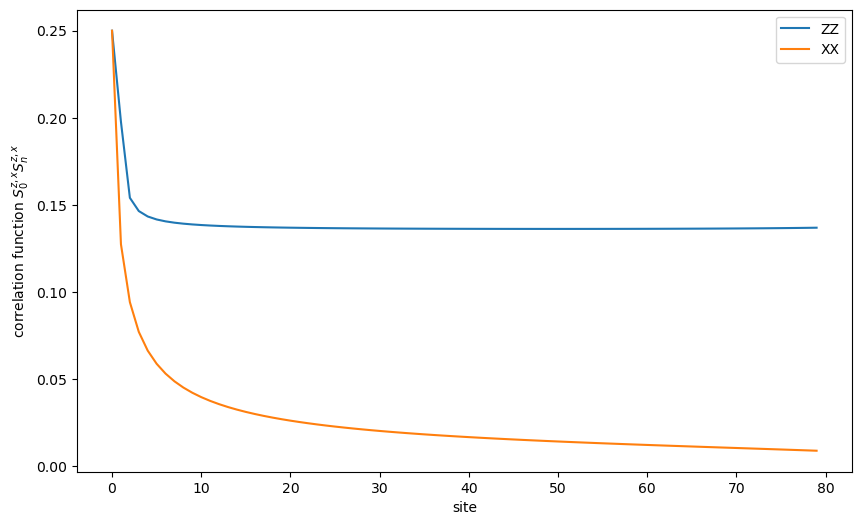

In [26]:
plt.figure(figsize = (10,6))
x = np.arange(psi.L)[:80]
plt.plot(x, ZZ[0], label="ZZ")
plt.plot(x, XX[0], label="XX")   # note: it's clear that this is zero due to charge conservation!
plt.xlabel("site")
plt.ylabel("correlation function $S^{z,x}_0 S^{z,x}_n$")
plt.legend()
plt.show()

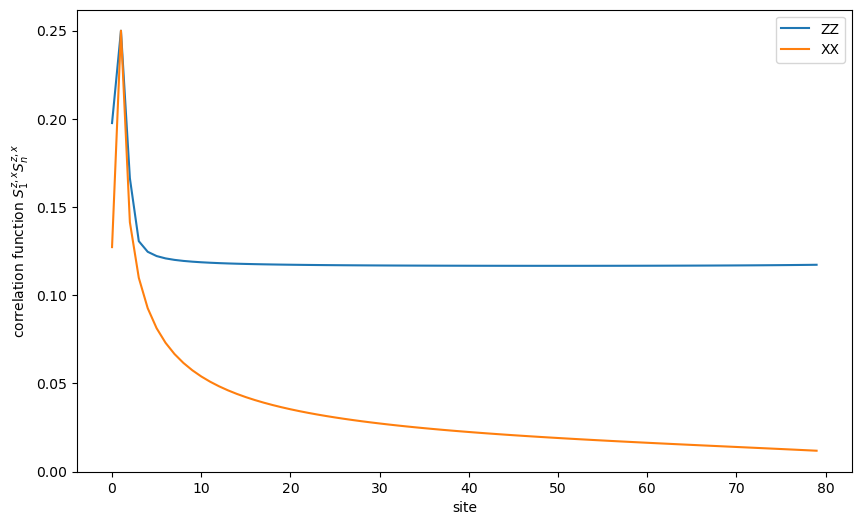

In [27]:
plt.figure(figsize = (10,6))
x = np.arange(psi.L)[:80]
plt.plot(x, ZZ[1], label="ZZ")
plt.plot(x, XX[1], label="XX")   # note: it's clear that this is zero due to charge conservation!
plt.xlabel("site")
plt.ylabel("correlation function $S^{z,x}_1 S^{z,x}_n$")
plt.legend()
plt.show()

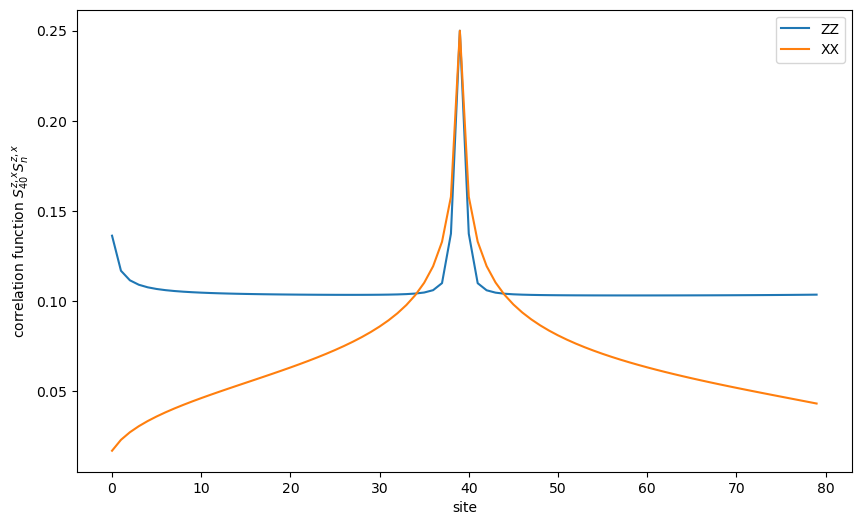

In [28]:
plt.figure(figsize = (10,6))
x = np.arange(psi.L)[:80]
plt.plot(x, ZZ[39], label="ZZ")
plt.plot(x, XX[39], label="XX")   # note: it's clear that this is zero due to charge conservation!
plt.xlabel("site")
plt.ylabel("correlation function $S^{z,x}_{40} S^{z,x}_n$")
plt.legend()
plt.show()